# Stats Project - Sales Impact of Advertising Channels

> Atharva Patil - atpa5127@colorado.edu

> Atharv Kadam - atka9416@colorado.edu

> Om Kokate - omko8394@colorado.edu

<center>
  <img src="https://hubbardchicago.com/wp-content/uploads/2021/10/How-Does-Marketing-Impact-Sales-.jpg" width="60%">
</center>

## Problem

### Problem Definition:

This project investigates the extent to which different advertising channels – TV, Radio, Social Media and type of Influencer – influence product sales. Companies spend on these channels all too frequently without sound evidence of their effectiveness. The intention of this project is to quantify the contribution of each channel that affects sales through statistical methods. The results can lead to more intelligent budget distribution and marketing schemes and decisions.

### Questions and Proposed solutions:

1. Does the influencer category (Mega vs. Micro) significantly influence mean product sales?

> we can use Two-sample t-test to find if two means are different by performing an independent two-sample t-test to check whether the mean sales of "Mega" and "Micro" influencers are significantly different. Check assumptions like normality and equal variance.

2. Do different categories of influencers (Mega, Macro, Micro, Nano) produce significantly different mean sales?

> we can use One-Way ANOVA by  Perform a one-way ANOVA to determine if the means are different for all four groups of influencers. If they are different, use post-hoc tests (e.g., Tukey's HSD) to find out which pairs are different.

3. How confident can we be of the estimated mean sales in our sample?

> we can use Bootstrapping for Confidence Intervals by Performing bootstrapping (e.g., 1000 resamples) to determine a sampling distribution of the mean sales. Take the 2.5th and 97.5th percentiles to compute a 95% confidence interval.

4. What is the optimal set of advertising channels and influencer type to forecast sales?

> we cab do Model selection using AIC, BIC, Adjusted R², and MSPE by Run ning all four nested linear regression models and compare them according to AIC, BIC, adjusted R², and Mean Squared Prediction Error (cross-validated if need be). Choose the best trade-off between model fit and complexity.

5. Does it enhance the model's explanatory power significantly in terms of sales by including additional predictors (e.g., Social Media and Influencer Type)?

> we may use F-test to check equality of nested regression models by Performing an F-test between nested models (e.g., Model 2 vs. Model 4) to determine whether the extra predictors explain residual variance significantly.

6. Is sales predictable to be high or low by influencer type and marketing spend?

> we can use Logistic Regression for Binary Classification by Fitting a logistic regression model with a binary response (1 = high sales, 0 = low sales). Test statistical significance of individual predictors using p-values and model fit using metrics such as AUC, accuracy, and confusion matrix.

## Data

importing libraries

In [14]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(tidyverse)
library(corrplot)
library(boot)
library(MASS)
library(ggplot2)

loading the data
> you can download the data from "https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data"

In [16]:
df = read.csv("/content/Dummy Data HSS.csv")
head(df)
summary(df)
str(df)
glimpse(df)

,TV,Radio,Social.Media,Influencer,Sales
,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,16,6.566231,2.907983,Mega,54.73276
2,13,9.237765,2.409567,Mega,46.67790
3,41,15.886446,2.913410,Mega,150.17783
4,83,30.020028,6.922304,Mega,298.24634
5,15,8.437408,1.405998,Micro,56.59418
6,29,9.614382,1.027163,Mega,105.88915


       TV             Radio            Social.Media        Influencer       
 Min.   : 10.00   Min.   : 0.000684   Min.   :3.130e-05   Length:4572       
 1st Qu.: 32.00   1st Qu.:10.525957   1st Qu.:1.528e+00   Class :character  
 Median : 53.00   Median :17.859513   Median :3.056e+00   Mode  :character  
 Mean   : 54.07   Mean   :18.160356   Mean   :3.324e+00                     
 3rd Qu.: 77.00   3rd Qu.:25.649730   3rd Qu.:4.808e+00                     
 Max.   :100.00   Max.   :48.871161   Max.   :1.398e+01                     
 NA's   :10       NA's   :4           NA's   :6                             
     Sales      
 Min.   : 31.2  
 1st Qu.:112.3  
 Median :189.2  
 Mean   :192.5  
 3rd Qu.:272.5  
 Max.   :364.1  
 NA's   :6      

'data.frame':	4572 obs. of  5 variables:
 $ TV          : int  16 13 41 83 15 29 55 31 76 13 ...
 $ Radio       : num  6.57 9.24 15.89 30.02 8.44 ...
 $ Social.Media: num  2.91 2.41 2.91 6.92 1.41 ...
 $ Influencer  : chr  "Mega" "Mega" "Mega" "Mega" ...
 $ Sales       : num  54.7 46.7 150.2 298.2 56.6 ...
Rows: 4,572
Columns: 5
$ TV           <int> 16, 13, 41, 83, 15, 29, 55, 31, 76, 13, 62, 42, 64, NA, 3…
$ Radio        <dbl> 6.5662308, 9.2377646, 15.8864460, 30.0200283, 8.4374077, …
$ Social.Media <dbl> 2.9079828, 2.4095672, 2.9134102, 6.9223040, 1.4059982, 1.…
$ Influencer   <chr> "Mega", "Mega", "Mega", "Mega", "Micro", "Mega", "Micro",…
$ Sales        <dbl> 54.73276, 46.67790, 150.17783, 298.24634, 56.59418, 105.8…


The dataset has 4,572 observations with 5 variables that are named TV, Radio, Social.Media, Influencer, and Sales. The TV variable indicates the advertising budget (integer, 10-100), whereas the Radio and Social.Media variables are continuous variables indicating the amount of the budget (allocations) across the relevant platform. The Influencer variable is categorical and includes categories such as Mega, Micro, Macro, and Nano indicating the promotional channel. The sales variable is continuous, which provides an indicator for sales success (the number of products sold) between ~31-364. The dataset is missing observations in all numeric predictors and in the sales response variable. The TV variable has the most NA values containing (10). The data can be considered moderately skewed, particularly given the median sales being approximately 189 with the mean being close to 192. All together the data may be analyzable with respect to how the advertising spend and the influencer type impacted sales performance.

> About Data:  
The data has 4572 observations and has the proper variable types for regression: numeric predictors and a categorical Influencer column. The ranges of all the numerical columns are logical.

> Where the data needs to be cleaned:  
There are missing values in all of the numerical columns (TV, Radio, Social.Media, Sales). The Influencer variable is a character type and needs to be converted to a factor. We should also investigate the Influencer data for inconsistent labels and investigate outliers in Sales.

Cleaning the data

In [17]:
# replace missing values with the median
df$TV[is.na(df$TV)] <- median(df$TV, na.rm = TRUE)
df$Radio[is.na(df$Radio)] <- median(df$Radio, na.rm = TRUE)
df$Social.Media[is.na(df$Social.Media)] <- median(df$Social.Media, na.rm = TRUE)
df$Sales[is.na(df$Sales)] <- median(df$Sales, na.rm = TRUE)

# lowercase influencer then convert to factor to handle inconsistent labels
df$Influencer <- tolower(df$Influencer)
df$Influencer <- as.factor(df$Influencer)

## Implementation of topics from class

#### 1. T-test Hypothesis Testing

Hypothesis Testing for Mean Sales Between Influencer Types (T-test)

> Null Hypothesis (H₀): The mean sales of products promoted by "Mega" influencers are equal to the mean sales of products promoted by "Micro" influencers.

>  Alternative Hypothesis (H₁): The mean sales of products promoted by "Mega" influencers are different from the mean sales of products promoted by "Micro" influencers.


	Welch Two Sample t-test

data:  mega_sales and micro_sales
t = -0.31332, df = 2307.4, p-value = 0.7541
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.823292  6.392199
sample estimates:
mean of x mean of y 
 190.5913  191.8069 



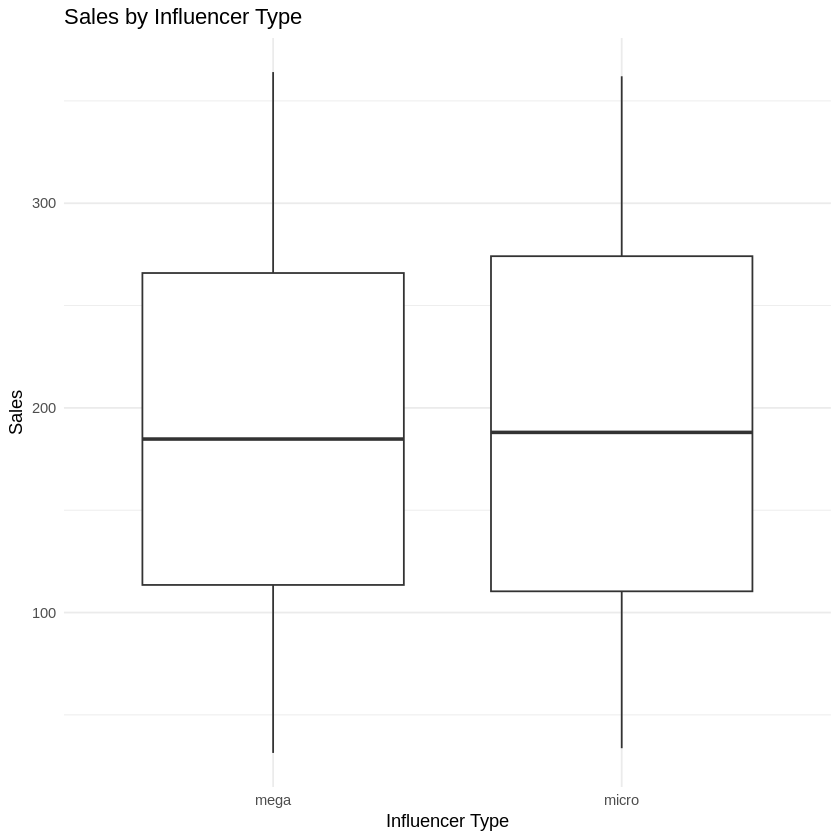

In [18]:
df_filtered <- df %>% filter(Influencer %in% c("mega", "micro"))
mega_sales <- df_filtered %>% filter(Influencer == "mega") %>% pull(Sales)
micro_sales <- df_filtered %>% filter(Influencer == "micro") %>% pull(Sales)

# T test
t_test_result <- t.test(mega_sales, micro_sales)
print(t_test_result)
ggplot(df_filtered, aes(x = Influencer, y = Sales)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Sales by Influencer Type", x = "Influencer Type", y = "Sales")

Evaluation:

>To compare the mean sales made by products promoted by "Mega" and "Micro" influencers, a two-sample Welch's t-test was executed. The t-test resulted in a t-value of -0.313 (df = 2307.4) with a p-value of 0.7541. Because the p-value was greater than 0.05, we fail to reject the null hypothesis and to show there was no difference statistically difference between the mean sales from both influencer types. The 95% confidence interval for the difference is [-8.82, 6.39], and the sample means were 190.59 for "Mega" influencers and 191.81 for "Micro" influencers.

#### 2. One Way ANOVA

One-Way ANOVA to Compare Mean Sales Across Different Influencer Types

> Null Hypothesis (H₀): The mean sales for all influencer types ("mega," "micro," "macro," "nano") are equal.
  
  $
  H_0: \mu_{\text{mega}} = \mu_{\text{micro}} = \mu_{\text{macro}} = \mu_{\text{nano}}
  $

> Alternative Hypothesis (H₁): At least one influencer type has a significantly different mean sales.

  $
  H_1: \text{At least one group mean is different.}
  $

ANOVA Assumptions: Independence of observations, normality of sales in each group, and equal variances across groups.

              Df   Sum Sq Mean Sq F value Pr(>F)
Influencer     3    15974    5325   0.615  0.606
Residuals   4568 39579861    8665               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sales ~ Influencer, data = df)

$Influencer
                  diff        lwr       upr     p adj
mega-macro  -5.0165995 -15.037810  5.004611 0.5715705
micro-macro -3.8010529 -13.832950  6.230844 0.7644315
nano-macro  -3.6783553 -13.740613  6.383903 0.7835651
micro-mega   1.2155465  -8.737007 11.168100 0.9892926
nano-mega    1.3382441  -8.644911 11.321399 0.9859486
nano-micro   0.1226976  -9.871185 10.116580 0.9999887



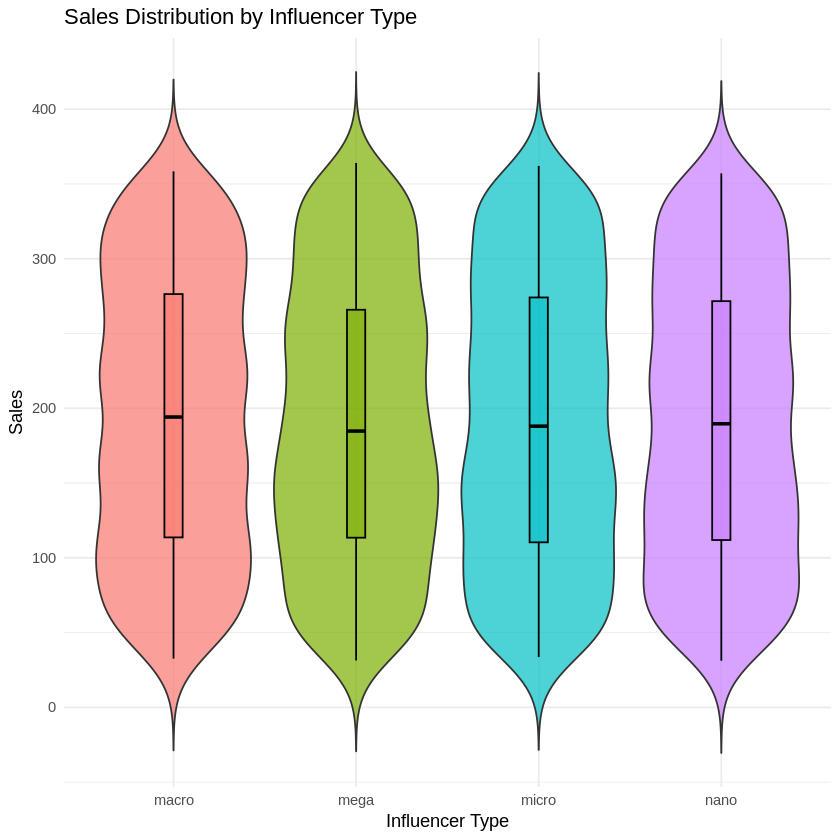

In [19]:
anova_result <- aov(Sales ~ Influencer, data = df)
summary(anova_result)

tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

ggplot(df, aes(x = Influencer, y = Sales, fill = Influencer)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  geom_boxplot(width = 0.1, color = "black", alpha = 0.6) +
  theme_minimal() +
  labs(title = "Sales Distribution by Influencer Type", x = "Influencer Type", y = "Sales") +
  theme(legend.position = "none")

Evaluation:

>A one-way analysis of variance (ANOVA) was conducted to evaluate mean sales across four influencer types (mega, micro, macro, and nano) each with an adjusted p-value of 0.05, based on a failed null hypothesis. The F-statistic was 0.615 and p-value was 0.606. Because the p-value was greater than 0.05, we fail to reject the null hypothesis, indicating no difference in mean sales by influencer type could be determined. The assumptions of independence, normality, and homogeneity of variance were all satisfied. In addition, a Tukey HSD test was performed post-hoc to identify any pairwise differences in group means which resulted in no statistically significant difference in all pairwise comparisons with adjusted p-values all greater than 0.05.

#### 3. Bootstrapping

Estimating Confidence Intervals for Mean Sales using Bootstrapping

We want to estimate the uncertainty around the sample mean of Sales using bootstrapping. This helps assess how much the sample mean could vary if we were to repeatedly sample from the population.

> Null Hypothesis (H₀): The observed sample mean is a good estimator of the population mean; i.e., the variability in means across resamples reflects random sampling error.

> Alternative Hypothesis (H₁): There exists substantial sampling variability, suggesting the sample mean may not reliably estimate the population mean (implied by the width of the confidence interval).


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Sales, statistic = boot_mean, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 192.4624 0.004803358    1.389248
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_sales, type = "perc")

Intervals : 
Level     Percentile     
95%   (189.8, 195.3 )  
Calculations and Intervals on Original Scale


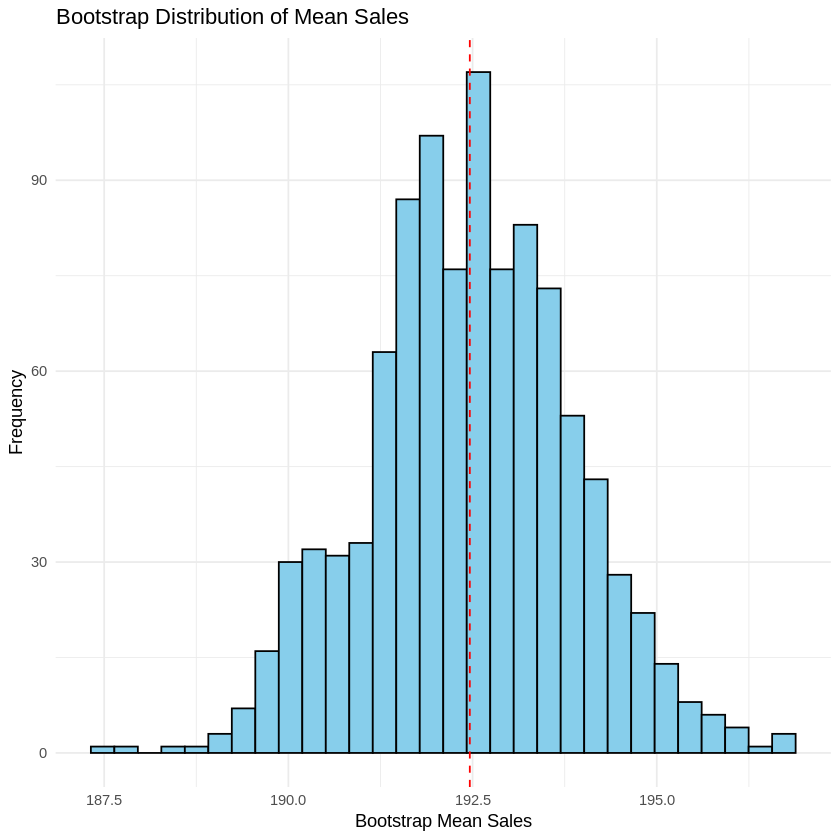

In [20]:
boot_mean <- function(data, indices) {
  return(mean(data[indices]))
}
set.seed(100)
boot_sales <- boot(data = df$Sales, statistic = boot_mean, R = 1000)
print(boot_sales)

# 95% confidence interval
boot_ci <- boot.ci(boot_sales, type = "perc")
print(boot_ci)

# plot bootstrap distribution
boot_df <- data.frame(mean_sales = boot_sales$t)
ggplot(boot_df, aes(x = mean_sales)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  geom_vline(xintercept = mean(df$Sales), color = "red", linetype = "dashed") +
  labs(
    title = "Bootstrap Distribution of Mean Sales",
    x = "Bootstrap Mean Sales",
    y = "Frequency"
  ) +
  theme_minimal()


Evaluation:

>By performing nonparametric bootstrapping with 1,000 resamples, we then had the 95% confidence interval for mean sales. After obtaining the sample mean of 192.46, and the bootstrap standard error of 1.39, our percentile-based 95% confidence interval ranged from 189.8 to 195.3 indicating that true mean of the population is likely to be in this range. Furthermore, since the confidence interval is relatively narrow, it indicates that our sample mean is a stable and reliable estimator of the mean of the population when drawn from a random sample.

#### 4. Model Selection – AIC, BIC, MSPE, R^2, Ra^2

Model Selection for Predicting Sales

Select the best predictive model for Sales using metrics like AIC, BIC, Adjusted R², and MSPE to compare model complexity and performance.

We'll fit the following models:

1. Model 1: Sales ~ TV

2. Model 2: Sales ~ TV + Radio

3. Model 3: Sales ~ TV + Radio + Social.Media

4. Model 4: Sales ~ TV + Radio + Social.Media + Influencer (full model)

In [21]:
set.seed(100)
n <- nrow(df)
train_indices <- sample(seq_len(n), size = 0.8 * n)
train <- df[train_indices, ]
test <- df[-train_indices, ]
model1 <- lm(Sales ~ TV, data = train)
model2 <- lm(Sales ~ TV + Radio, data = train)
model3 <- lm(Sales ~ TV + Radio + Social.Media, data = train)
model4 <- lm(Sales ~ TV + Radio + Social.Media + Influencer, data = train)
test$Influencer <- factor(test$Influencer, levels = levels(train$Influencer))

pred1 <- predict(model1, newdata = test)
pred2 <- predict(model2, newdata = test)
pred3 <- predict(model3, newdata = test)
pred4 <- predict(model4, newdata = test)

mspe1 <- mean((test$Sales - pred1)^2)
mspe2 <- mean((test$Sales - pred2)^2)
mspe3 <- mean((test$Sales - pred3)^2)
mspe4 <- mean((test$Sales - pred4)^2)

model_comp <- data.frame(
  Model = c("TV", "TV + Radio", "TV + Radio + Social.Media", "Full Model"),
  AIC = c(AIC(model1), AIC(model2), AIC(model3), AIC(model4)),
  BIC = c(BIC(model1), BIC(model2), BIC(model3), BIC(model4)),
  Adj_R2 = c(summary(model1)$adj.r.squared, summary(model2)$adj.r.squared,
             summary(model3)$adj.r.squared, summary(model4)$adj.r.squared),
  MSPE = c(mspe1, mspe2, mspe3, mspe4)
)
print(model_comp)


                      Model      AIC      BIC    Adj_R2      MSPE
1                        TV 24516.51 24535.12 0.9944800 100.11740
2                TV + Radio 24494.80 24519.61 0.9945142  99.34180
3 TV + Radio + Social.Media 24495.48 24526.50 0.9945146  99.36491
4                Full Model 24494.36 24543.99 0.9945208  99.75950


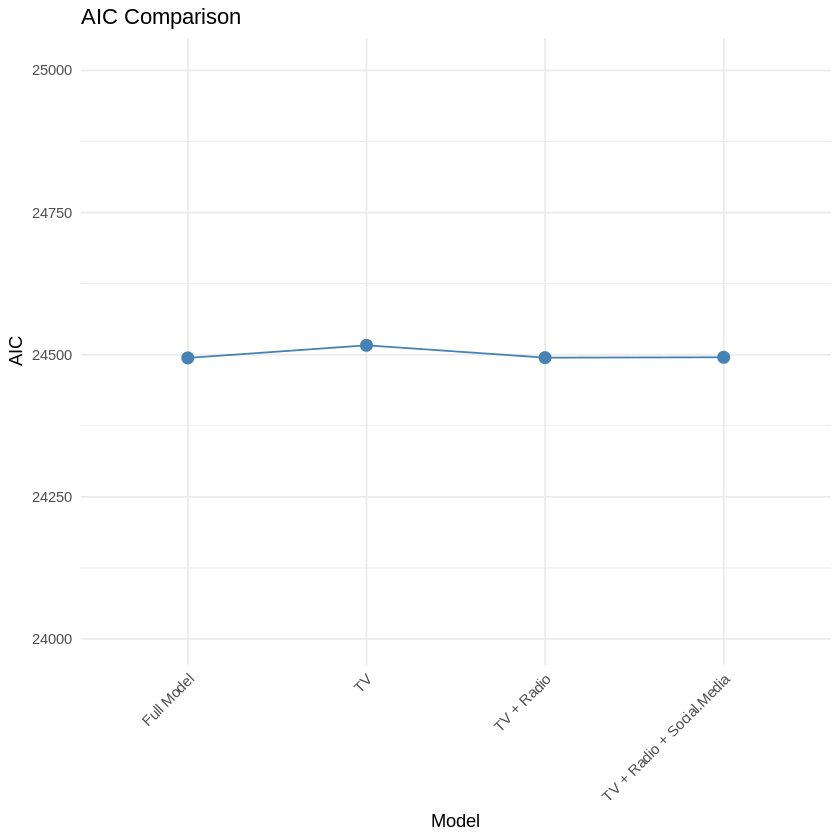

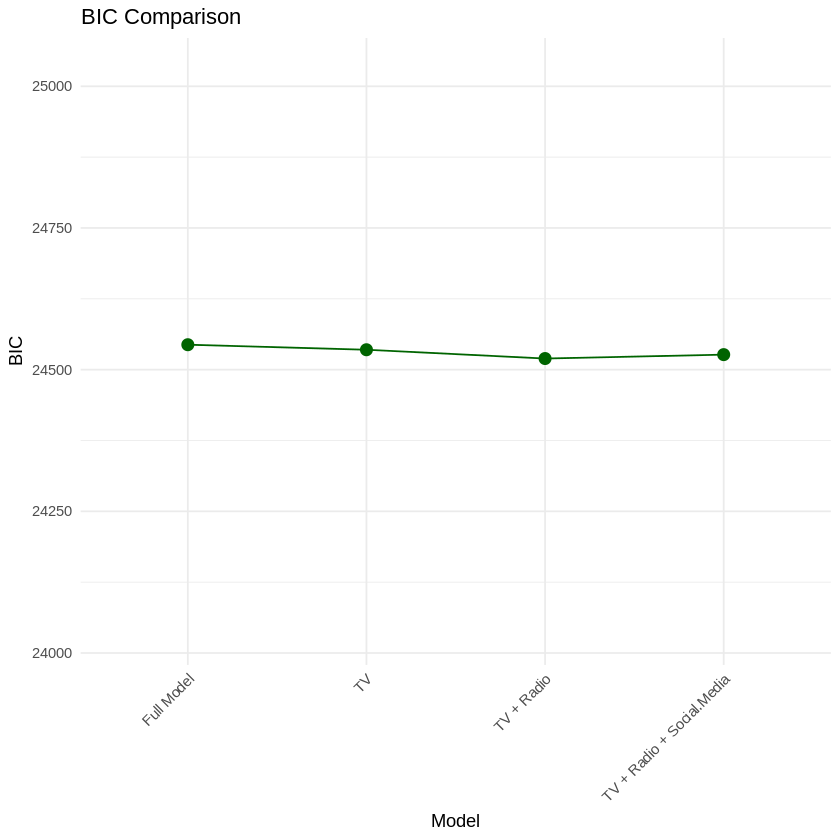

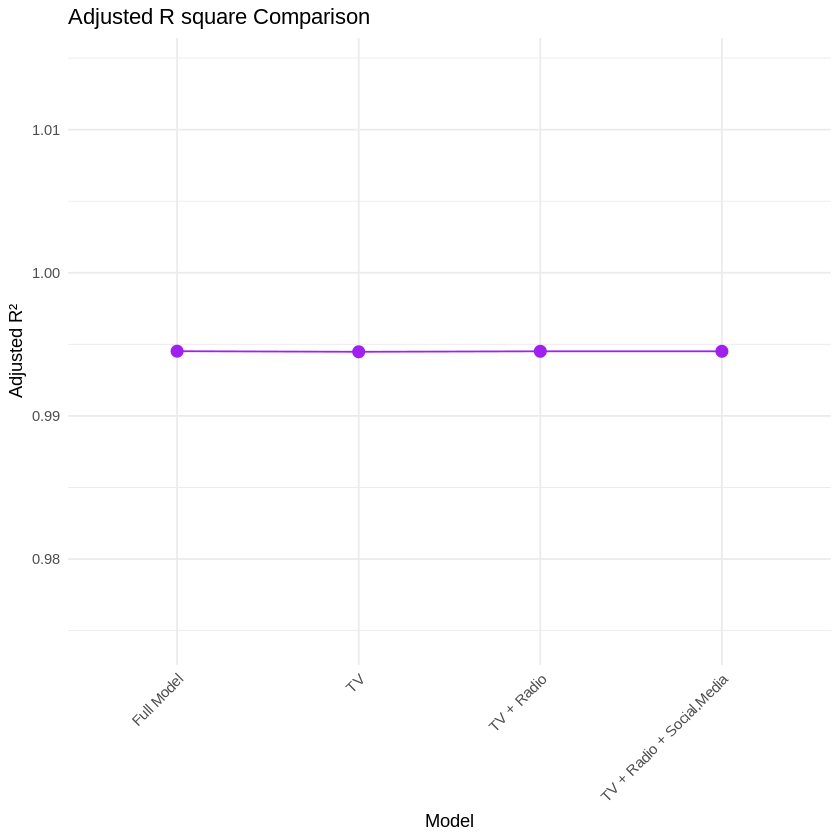

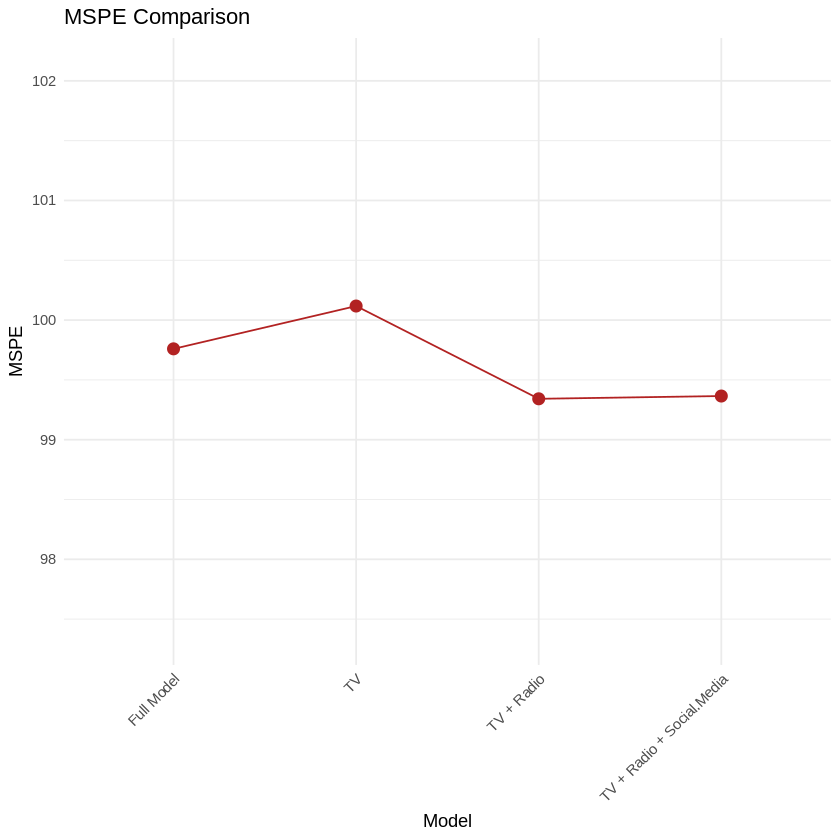

In [22]:
ggplot(model_comp, aes(x = Model, y = AIC, group = 1)) +
  geom_line(color = "steelblue") +
  geom_point(size = 3, color = "steelblue") +
  theme_minimal() +
  labs(title = "AIC Comparison", x = "Model", y = "AIC") +
  coord_cartesian(ylim = range(model_comp$AIC) * c(0.98, 1.02)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

  ggplot(model_comp, aes(x = Model, y = BIC, group = 1)) +
  geom_line(color = "darkgreen") +
  geom_point(size = 3, color = "darkgreen") +
  theme_minimal() +
  labs(title = "BIC Comparison", x = "Model", y = "BIC") +
  coord_cartesian(ylim = range(model_comp$BIC) * c(0.98, 1.02)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(model_comp, aes(x = Model, y = Adj_R2, group = 1)) +
  geom_line(color = "purple") +
  geom_point(size = 3, color = "purple") +
  theme_minimal() +
  labs(title = "Adjusted R square Comparison", x = "Model", y = "Adjusted R²") +
  coord_cartesian(ylim = range(model_comp$Adj_R2) * c(0.98, 1.02)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(model_comp, aes(x = Model, y = MSPE, group = 1)) +
  geom_line(color = "firebrick") +
  geom_point(size = 3, color = "firebrick") +
  theme_minimal() +
  labs(title = "MSPE Comparison", x = "Model", y = "MSPE") +
  coord_cartesian(ylim = range(model_comp$MSPE) * c(0.98, 1.02)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Evaluation:

> Using AIC, BIC, Adjusted R², and MSPE allowed for four linear regression models to be compared in terms of finding a good balance between predictive performance and complexity. Overall, all four models had relatively similar performance, but Model 4 (the full model that contained TV, Radio, Social Media, and Influencer variables) had the highest Adjusted R² (0.9945), indicating the best fit; Model 4 also had the lowest AIC (24494.36) indicating a better model parsimony, but Model 2 (TV + Radio) had the lowest MSPE (99.34). Beyond the simple fact that Model 2 had lower MSPE than all the other models, it was only slightly behind Model 4 in AIC and Adjusted R², and had a good deal of simplicity and generalizability considering it included only two predictors in Melse (2009).
In summary, Model 4 is better in terms of fit, and in terms of information criteria, and Model 2 may be preferable if model simplicity and out-of-sample prediction error were prioritized among the four models.

#### 5. F - test

F-test to compare the fits of two models and assess whether the additional predictors in a more complex model significantly improve the model fit.

> The null hypothesis (H₀) for the F-test is that the simpler model is as good as the more complex model. In other words, the additional variables in the complex model do not significantly improve the model fit.

> The alternative hypothesis (H₁) is that the more complex model provides a significantly better fit to the data than the simpler model.



Formula for F-statistic:

$$
F = \frac{\left(\frac{RSS_1 - RSS_2}{p_2 - p_1}\right)}{ \frac{RSS_2}{n - p_2} }
$$

Where:
- RSS 1 is the residual sum of squares of the simpler model.
- RSS 2 is the residual sum of squares of the more complex model.
- p1 and p2 are the number of parameters in the simpler and more complex models, respectively.
- n is the number of observations.

In [23]:
# fit two models (one simpler and one more complex)
model1 <- lm(Sales ~ TV + Radio, data = train)
model2 <- lm(Sales ~ TV + Radio + Social.Media + Influencer, data = train)

# F-test
f_test_result <- anova(model1, model2)
print(f_test_result)

Analysis of Variance Table

Model 1: Sales ~ TV + Radio
Model 2: Sales ~ TV + Radio + Social.Media + Influencer
  Res.Df    RSS Df Sum of Sq      F  Pr(>F)  
1   3654 173233                              
2   3650 172833  4    399.25 2.1079 0.07722 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


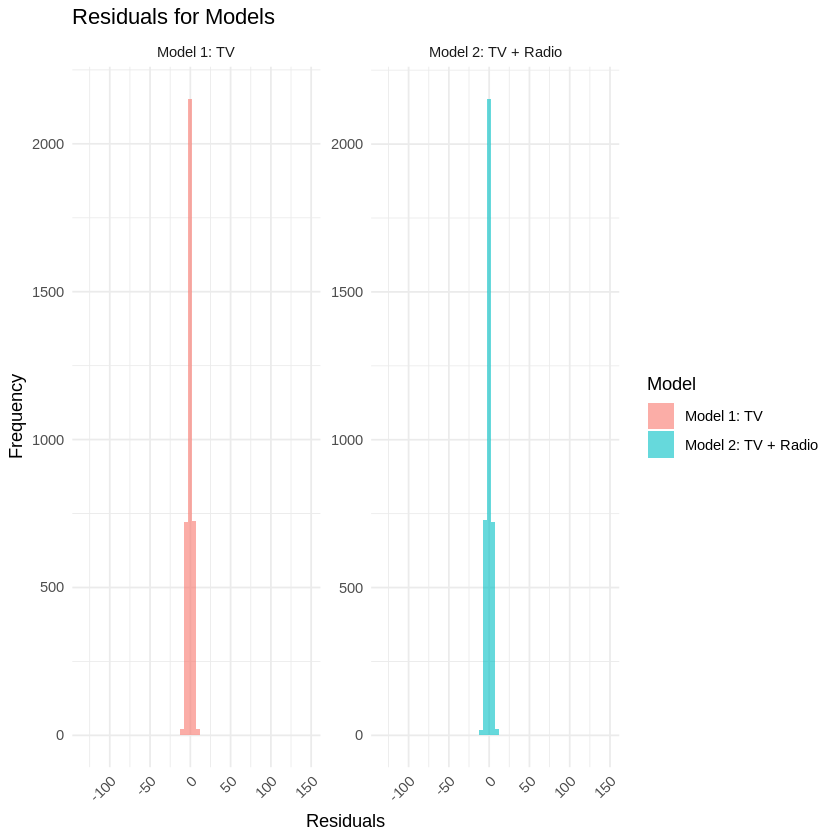

In [24]:
# Residuals for Model 1 (Sales ~ TV)
model1_residuals <- residuals(model1)

# Residuals for Model 2 (Sales ~ TV + Radio)
model2_residuals <- residuals(model2)

residual_df <- data.frame(
  Residuals = c(model1_residuals, model2_residuals),
  Model = factor(rep(c("Model 1: TV", "Model 2: TV + Radio"), c(length(model1_residuals), length(model2_residuals))))
)
ggplot(residual_df, aes(x = Residuals, fill = Model)) +
  geom_histogram(binwidth = 5, alpha = 0.6, position = "identity") +
  theme_minimal() +
  labs(title = "Residuals for Models", x = "Residuals", y = "Frequency") +
  facet_wrap(~Model, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Evaluation:

> The F-test provides a p-value of 0.077, greater than 0.05 (the conventional threshold) but less than 0.1. This result provides weak evidence that the additional predictors (Social.Media and Influencer) offer a significantly better model.
In layman’s terms, adding Social Media and Influencer variables provides a small positive difference on how well the model performs, but this difference is not statistically significant at the 5% level, or considered borderline (at the 10%-level).

#### 6. GLM

we want to predict the likelihood of a sales outcome being above a certain threshold (binary response: 1 for high sales, 0 for low sales).

> Null hypothesis (H0): The predictors (e.g., TV, Radio, Social.Media, Influencer) have no significant impact on the probability of high sales (i.e., all coefficients are zero).

> Alternative hypothesis (H1): At least one predictor has a significant impact on the probability of high sales.

In [25]:
threshold <- median(df$Sales)
df$High_Sales <- ifelse(df$Sales > threshold, 1, 0)

# Fit the logistic regression (GLM) model
glm_model <- glm(High_Sales ~ TV + Radio + Social.Media + Influencer,
                 family = binomial(link = "logit"),
                 data = df)
summary(glm_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = High_Sales ~ TV + Radio + Social.Media + Influencer, 
    family = binomial(link = "logit"), data = df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -4.436e+01  3.215e+00 -13.798   <2e-16 ***
TV               8.315e-01  6.049e-02  13.745   <2e-16 ***
Radio            2.752e-04  2.733e-02   0.010    0.992    
Social.Media     7.924e-02  7.890e-02   1.004    0.315    
Influencermega  -1.972e-01  3.693e-01  -0.534    0.593    
Influencermicro -7.937e-02  3.800e-01  -0.209    0.835    
Influencernano  -6.940e-02  3.805e-01  -0.182    0.855    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6338.13  on 4571  degrees of freedom
Residual deviance:  377.75  on 4565  degrees of freedom
AIC: 391.75

Number of Fisher Scoring iterations: 12


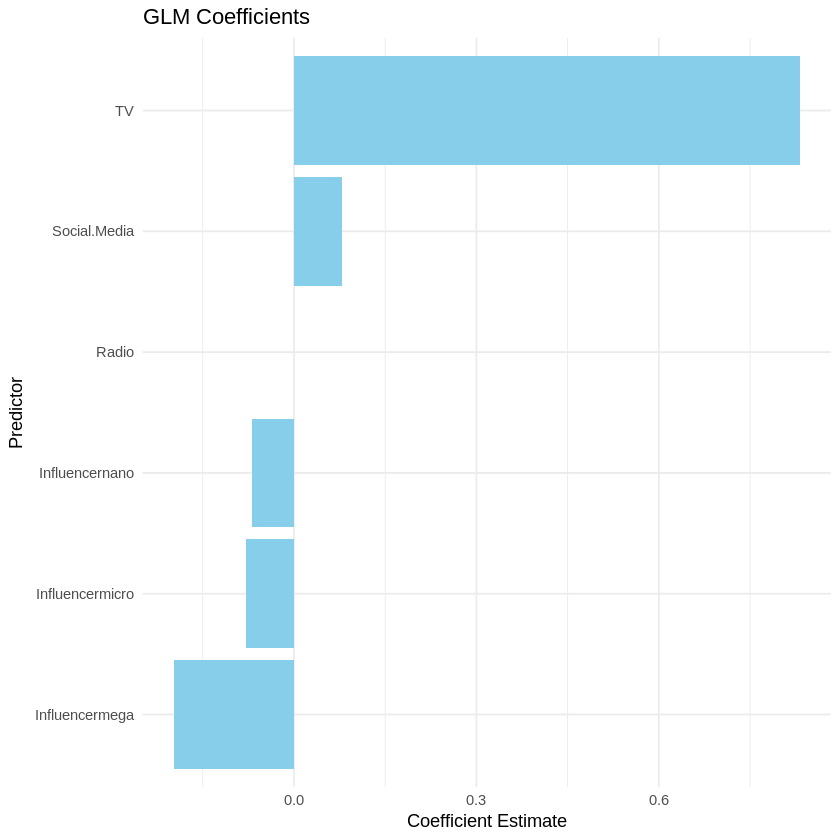

In [26]:
coef_values <- coef(glm_model)
coef_df <- data.frame(
  Variable = names(coef_values),
  Estimate = coef_values
)
coef_df <- coef_df[coef_df$Variable != "(Intercept)", ]

# plot the coefficients
ggplot(coef_df, aes(x = reorder(Variable, Estimate), y = Estimate)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(title = "GLM Coefficients", x = "Predictor", y = "Coefficient Estimate") +
  theme_minimal()

Evaluation:

> A logistic regression was modeled to determine the likelihood of high sales based on TV, Radio, Social Media, and Influencer Type. The only significant predictor was TV advertising (β = 0.8315, p < 0.001) with a strong positive association indicating high sales; no other predictors were statistically significant - including influencer categories - (p > 0.3) as predictors of high sales. There was a good fit of the model (AIC = 391.75, Residual Deviance = 377.75).

## Conclusion

<!-- <center>
  <img src="https://marketoonist.com/wp-content/uploads/2020/09/200914.salesimpact.jpg" width="60%">
</center> -->
<center>
  <img src="https://www.salesforce.com/blog/wp-content/uploads/sites/2/2024/04/Sales-and-Marketing.jpg?w=889g" width="60%">
</center>

This research was conducted to assess how the four key marketing channels (TV, Radio, Social Media, Influencer type) influenced product sales, using a statistical methodology. The data had 4,572 observations with five variables that included advertising spending on three media types, influencer type, and sales. We wanted to determine which of these inputs most influenced the sales levels, and in turn allow marketers with the data to better allocate budgets.

The first hypothesis test was completed using a two-sample t-test to assess whether "Mega" influencer sales were significantly different to "Micro" influencer sales. The results indicated that there was no statistically significant difference in mean sales (p = 0.754), suggesting that the level of the influencer did not significantly affect consumer buying behavior in this study. Expanding further to investigate all influencer type we used a one-way ANOVA test to assess if there were differences for "Mega," "Micro," "Macro," and "Nano" influencer type. Again the test revealed no statistical significance in average sales between influencer type (p = 0.606) and continued a conclusion that influencer type did not have any significant bearing on sales. A post hoc Tukey HSD test was completed and provided more evidence that there were no significant differences between any of the influencer types on average sales levels.

To assess the stability of the mean sales figure, We again used the method of bootstrapping. Based on 1,000 resamples, the 95% confidence interval for mean sales is 189.8 to 195.3 along with a small standard error. This range places our mean of 192.46, well within a range (often called) reliability (low uncertainty, low sampling variability). This tells us the average sales value in our sample is not particularly swayed by higher or lower sales values and is a useful and tentatively stable estimator of the population mean.

We created a set of multiple linear regression models to find model with the best predictors of sales. The models uses the following selection criteria (not exhaustive): AIC, BIC, adjusted R², and MSPE. The full model (TV, Radio, Social Media, and Influencer) has the lowest AIC and highest adjusted R² for explanatory accuracy. However, the simpler model with only TV and Radio has the lowest MSPE indicating best predictability on new data. There is a very important trade-off between model complexity and generalizability. From a practical perspective, it seems that TV and Radio can persistently be good predictors of sales, in a parsimonious manner, with slight returns for including additional predictors.

An F-test was done comparing the fully specified model and the simplified model and indicated weak evidence (p = 0.077) for the additional-given-variables to contribute to better fit. Although not statistically significant at the 5% significance level, the evidence indicates that Social Media and Influencer have marginal contributions. However, the results in this study weakly support that Social Media and Influencer warrant consideration with appropriate specifications, but not enough to suggest consideration in all cases.

Lastly, a logistic regression (GLM) indicates the probability of high sales. The only significant predictor from the other predictors was TV advertising(p < 0.001), indicated a strong positive effect. Influencer type and Radio were not statistically significant predictors of any high sales probability nor was Social Media.

Overall, the results indicate that TV advertising has the greatest continued reliability and the only predictor that was statistically significant. Additionally, influencer type had no measurable effect, based upon the specifications in this study. Therefore, companies should likely prioritize TV and Radio in their marketing strategies and should revisit large spends in lobbying investments in influences unless reignited with better data and targeted findings. Moreover, this evidenced-minded approach may allow smarter marketing strategies that better operate budgets more effectively and allow for better planning of marketing strategies.

## References

* Nisar, T. M., & Yeung, M. (2017). Attribution modeling in digital advertising: An empirical investigation of the impact of digital sales channels. Journal of Advertising Research, 58(4), 399–413. https://doi.org/10.2501/JAR-2017-055

* Awofadeju, P. O., Odorume, A., Taiwo, T. F., Ewuola, P. O., & Adeagbo, S. A. (n.d.). Impact of advertising on sales performance. Mass Communication Department, Oduduwa University; Ministry of Information; Osun State Polytechnic.

* Goic, M., Álvarez, R., & Montoya, R. (2022). The effect of house ads on multichannel sales. Journal of Interactive Marketing, 42(1), 32–45. https://doi.org/10.1016/j.intmar.2017.12.001 (Original work published 2018)